### Imports

In [13]:
from sklearn import preprocessing

from dataset import *
from models.base_model import *
from models.neural_net import *
from models.sampled_net import *
from viewer.visualisator import *
from logic import *
import dataset
import models.base_model
import models.neural_net
import models.sampled_net
import viewer.visualisator
import logic

import importlib

importlib.reload(dataset)
importlib.reload(models.base_model)
importlib.reload(models.neural_net)
importlib.reload(models.sampled_net)
importlib.reload(viewer.visualisator)
importlib.reload(logic)

<module 'logic' from 'c:\\Users\\dhia\\Documents\\sampled-networks\\logic.py'>

### Dataset creation

In [14]:
xd = 4  # Input space dimensions
yd = 4  # Output dimension
num_samples = 5000  # Number of data points
epochs = 100  # Number of training epochs
l = [200]  # Number of neurons in each layer


dataset = Dataset()
dataset.create_dataset_Barron(xd, num_samples)
dataset.scale(preprocessing.MinMaxScaler())
dataset.split_train_test(0.2)

### Neural Network training with Adam

In [15]:
model_nn = NeuralNet()
model_nn.fit(dataset.X_train, dataset.y_train, l, validation_split=0.2, epochs=epochs)

### Sampled Netwrok training with ridge, and losses comparaison

In [16]:
model_sampled = SampledNet()
alpha, radius = model_sampled.fit(
    dataset.X_train, dataset.y_train, model_nn, layer2="ridge", radius=0, alpha=-1
)

y_nn = model_nn.predict(dataset.X_test)
y_sampled = model_sampled.predict(dataset.X_test)

print(f"loss y_nn and y_test      \t{sklearn.metrics.mean_squared_error(y_nn, dataset.y_test)}")
print(f"loss y_sampled and y_test \t{sklearn.metrics.mean_squared_error(y_sampled, dataset.y_test)}")

Layer1 sampling: 100%|██████████| 200/200 [00:00<00:00, 2588.09it/s]

alpha 	loss
0.0001 	7.778e-04
0.001 	7.753e-04
0.01 	7.717e-04
0.1 	7.923e-04
1 	8.901e-04
10 	1.387e-03
100 	3.593e-03
loss y_nn and y_test      	0.001411567447708999
loss y_sampled and y_test 	0.0006597458245562051


### Plot the weights' angles differences, and prediction vs actual visualization

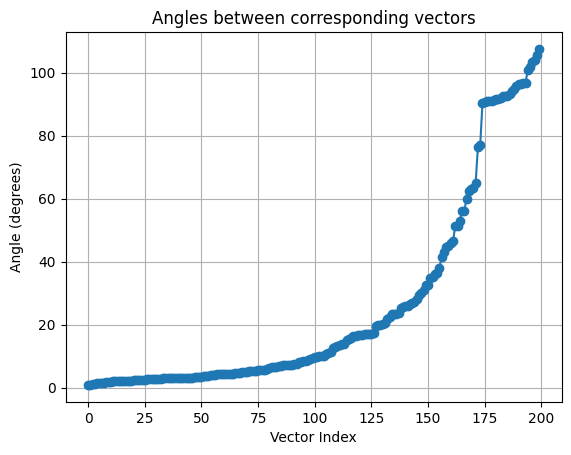

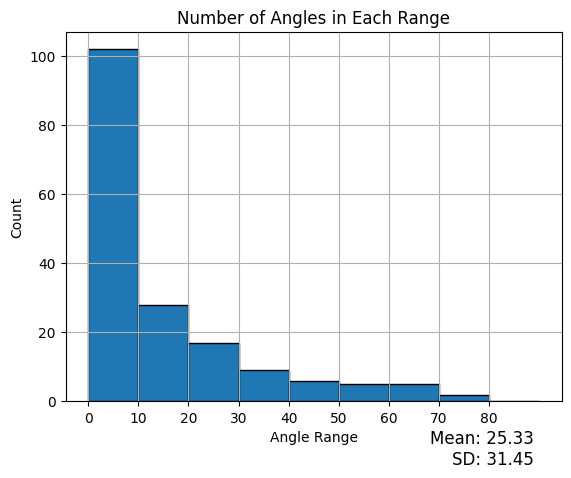

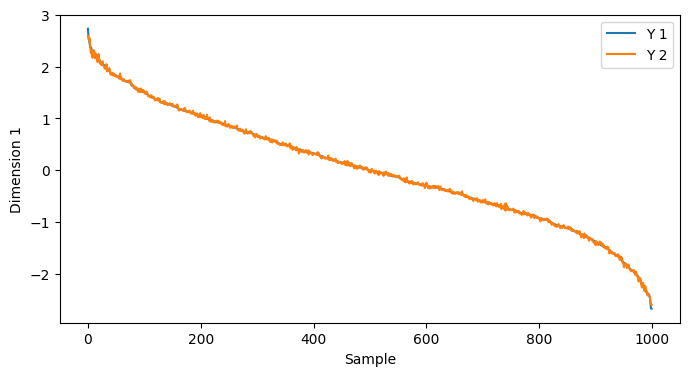

In [18]:
plot_vector_differences(np.transpose(model_nn.weights[0]), np.transpose(model_sampled.weights[0]))
visualize_data(dataset.y_test, y_sampled)

### Calculate loss vs alpha, radius.

In [92]:
dict_loss_vs_alpha_radius = loss_vs_aslpha_radius(dataset, model_nn)
write_to_file("results\loss_vs_alpha_radius.json", dict_loss_vs_alpha_radius)

radius: 0.000


Layer1 sampling:   0%|          | 0/200 [00:00<?, ?it/s]

Layer1 sampling: 100%|██████████| 200/200 [00:00<00:00, 4166.74it/s]


radius: 0.195


Layer1 sampling: 100%|██████████| 200/200 [00:00<00:00, 2395.01it/s]


radius: 0.390


Layer1 sampling: 100%|██████████| 200/200 [00:00<00:00, 471.51it/s]


radius: 0.585


Layer1 sampling: 100%|██████████| 200/200 [00:01<00:00, 148.16it/s]


radius: 0.779


Layer1 sampling: 100%|██████████| 200/200 [00:03<00:00, 54.95it/s]


radius: 0.974


Layer1 sampling: 100%|██████████| 200/200 [00:07<00:00, 26.60it/s]


radius: 1.169


Layer1 sampling: 100%|██████████| 200/200 [00:11<00:00, 16.73it/s]


radius: 1.364


Layer1 sampling: 100%|██████████| 200/200 [00:15<00:00, 12.74it/s]


radius: 1.559


Layer1 sampling: 100%|██████████| 200/200 [00:16<00:00, 12.40it/s]


radius: 1.754


Layer1 sampling: 100%|██████████| 200/200 [00:16<00:00, 12.22it/s]


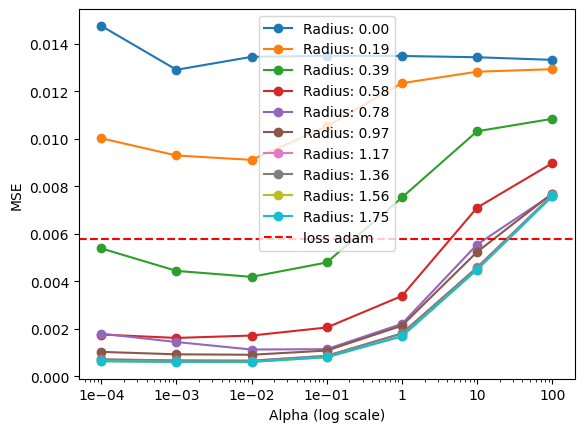

In [93]:
dict_loss_vs_alpha_radius = read_from_file("results\loss_vs_alpha_radius.json")
plot_loss_vs_alpha_radius(dict_loss_vs_alpha_radius)

### Dataset creation and neural networks training with different numbre of samples
In this section, we specify a list of different sample sizes to test. For each sample size: a synthetic dataset is generated with that number of data points, a neural network model is trained on the dataset using standard gradient descent, and a sampled neural network is also created and trained on the same dataset.

For each sample size, the performance of the sampled network with different dataset sizes. Another approach is in the next section

In [ ]:
nums_samples = [100, 200, 400, 800, 1600, 3200, 6400]
xd = 4
layers = [200]
datasets = []
models_nn = []
for num_samples in nums_samples:
    model_nn = NeuralNet()
    dataset = Dataset().create_dataset_Barron(xd, num_samples)
    dataset.scale(preprocessing.MinMaxScaler())
    dataset.split_train_test(0.2)
    model_nn.fit(dataset.X_train, dataset.y_train, layers)
    datasets.append(dataset)
    models_nn.append(model_nn)

### loss vs number of samples

In [ ]:
# Attention, takes 30+ minutes
dict_losses_vs_num_samples = loss_vs_num_samples(datasets, models_nn)
write_to_file("results\loss_vs_num_samples.json", dict_losses_vs_num_samples)

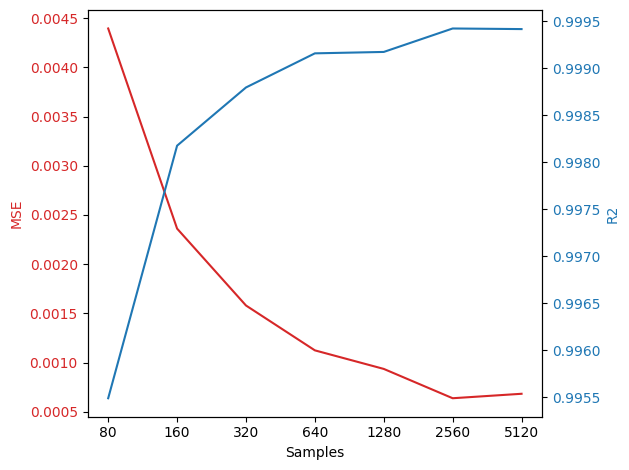

In [ ]:
dict_losses_vs_num_samples = read_from_file("results\loss_vs_num_samples.json")
plot_loss_f_num_samples(dict_losses_vs_num_samples)

In this part, we create one dataset for training, and one for testing. We train a classic neural network on the training dataset. Then, smaller subsets of varying sizes are extracted from the original training data. For each subset size, a sampled neural network is trained on just that subset. We then compare the output of the sampled networks trained with different numbers of samples.

In [ ]:
nums_samples_training = 4000
nums_samples_testing = 4000
xd = 4
layers = [200]

dataset_training = Dataset().create_dataset_Barron(xd, nums_samples_training)
dataset_training.scale(preprocessing.MinMaxScaler())

dataset_testing = Dataset().create_dataset_Barron(xd, nums_samples_testing)
dataset_testing.scale(preprocessing.MinMaxScaler())

model_nn = NeuralNet()
model_nn.fit(dataset_training.X, dataset_training.y, layers)

In [ ]:
nums_samples = [100, 200, 400, 800, 1600, 3200]

dict_losses_vs_num_samples_2 = {}
for num_samples in nums_samples:
    print(num_samples)
    X_train_tmp, y_train_tmp = dataset_training.get_random_subset(num_samples)
    model_sampled = SampledNet()
    alpha, radius = model_sampled.fit(
        X_train_tmp,
        y_train_tmp,
        model_nn,
        layer2="ridge",
        radius=-1,
        alpha=-1,
        verbose=0,
    )
    y_sampled_tmp = model_sampled.predict(dataset_testing.X)
    mse = loss_mse(dataset_testing.y, y_sampled_tmp)
    r2 = loss_r2(dataset_testing.y, y_sampled_tmp)
    dict_losses_vs_num_samples_2[num_samples] = {"mse": mse, "r2": r2}

write_to_file("results\loss_vs_num_samples_2.json", dict_losses_vs_num_samples_2)

100


100%|██████████| 100/100 [00:00<00:00, 197.05it/s]


200


100%|██████████| 100/100 [00:01<00:00, 98.27it/s]


400


100%|██████████| 100/100 [00:02<00:00, 44.11it/s]


800


100%|██████████| 100/100 [00:05<00:00, 17.23it/s]


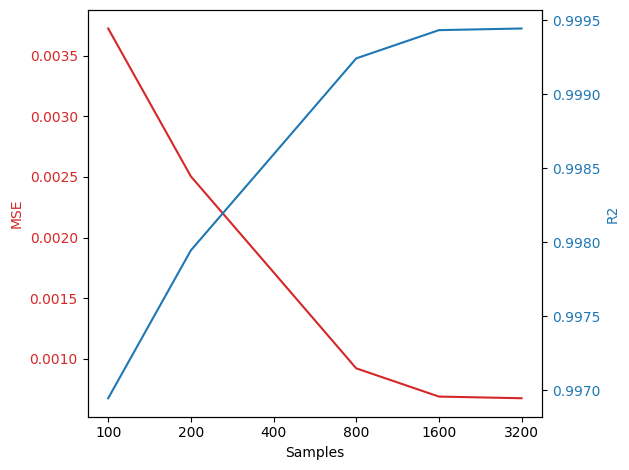

In [ ]:
dict_losses_vs_num_samples_2 = read_from_file("results\loss_vs_num_samples_2.json")
plot_loss_f_num_samples(dict_losses_vs_num_samples_2)